# Datasets

## From HuggingFace

In [4]:
from huggingface_hub import list_datasets

In [5]:
all_datasets = list_datasets()

In [6]:
type(all_datasets)

generator

In [7]:
from itertools import islice

first_5_datasets = list(islice(all_datasets, 5))
print([dataset.id for dataset in first_5_datasets])


['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus']


In [8]:
from datasets import load_dataset

In [9]:
emotions = load_dataset("emotion", trust_remote_code=True)

In [10]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [11]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [12]:
len(train_ds)

16000

In [13]:
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [14]:
train_ds.column_names

['text', 'label']

In [15]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [16]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [17]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

## From Pandas

In [18]:
import pandas as pd

In [19]:
emotions.set_format('pandas')

In [20]:
df = emotions['train'][:]

In [21]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [22]:
emotions['test'][:5]

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [23]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

In [24]:
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Looking class distribution

In [25]:
import matplotlib.pyplot as plt

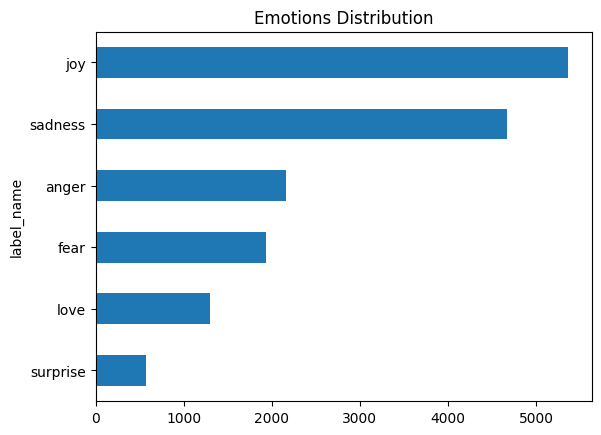

In [26]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Emotions Distribution')
plt.show()

Maximum context size es longitud maxima que tiene el input, en DistilBERT es de 512 tokens

### Long size our tweets

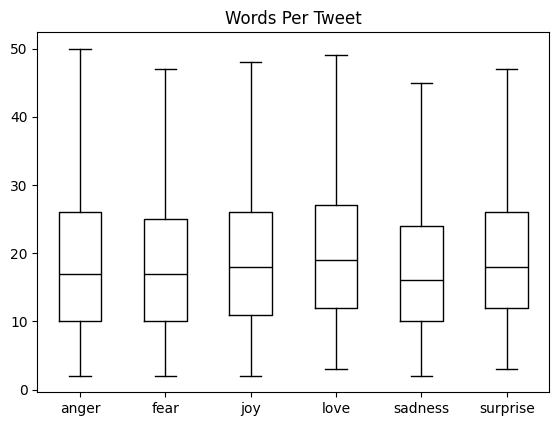

In [27]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name', grid=False, 
           showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [28]:
df.head()

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


In [29]:
emotions.reset_format()

# Tokenization

In [30]:
text = 'Tokenizing text is a core task of NLP'

## Word

In [31]:
tokenized_text = text.split()
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']

luego se le pone un ID a cada palabra y hay palabras equivocadas o con diferente puntuación y se pueden generar muchas palabras y al final se pone las palabras como UNK que sería "unknow"

el problema es que se pierde mucha información

## Subword

In [32]:
from transformers import AutoTokenizer

Ese AutoTokenizer usa WordPiece, que es usado por BERT y DistilBERT

In [33]:
model_ckpt = 'distilbert-base-uncased'

In [34]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [35]:
encoded_text = tokenizer(text)

In [36]:
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [37]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '[SEP]']

In [38]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp [SEP]'

In [39]:
tokenizer.vocab_size

30522

In [40]:
tokenizer.model_max_length

512

In [41]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [42]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [43]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [44]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [45]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [46]:
emotions['train'][:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3]}

In [47]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [48]:
emotions_encoded['train'][:1]

{'text': ['i didnt feel humiliated'],
 'label': [0],
 'input_ids': [[101,
   1045,
   2134,
   2102,
   2514,
   26608,
   102,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0]],
 'attention_mask': [[1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,


# Llamando el PLM

In [49]:
import torch
import torch.nn.functional as F

In [50]:
from transformers import AutoModel

In [51]:
model_ckpt = 'distilbert-base-uncased'

In [52]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

In [53]:
device

device(type='mps')

In [54]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

## Extraer los ultimos hidden states

In [55]:
text = 'this is a test'

In [56]:
inputs = tokenizer(text, return_tensors='pt')

In [57]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [58]:
inputs['input_ids']

tensor([[ 101, 2023, 2003, 1037, 3231,  102]])

In [59]:
inputs['attention_mask']

tensor([[1, 1, 1, 1, 1, 1]])

In [60]:
# Resultado = [batch_size, n_tokens]
inputs['input_ids'].size()

torch.Size([1, 6])

In [61]:
for j in inputs.items():
    print(j)

('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]]))
('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))


calculo las salidas del modelo por eso uso torch.no_grad() porque no quiero calcular las gradientes, para ello lo paso con el modelo y obtengo las salidas

In [62]:
inputs = {k: v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='mps:0'), hidden_states=None, attentions=None)


In [63]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask'])

In [64]:
inputs['input_ids']

tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='mps:0')

In [65]:
inputs['attention_mask']

tensor([[1, 1, 1, 1, 1, 1]], device='mps:0')

In [66]:
# Retorna solo el ultimo estado oculto
outputs.last_hidden_state

tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='mps:0')

In [67]:
# [batch_size, n_tokens, hidden_dim]
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [68]:
# Se usa el token CLS porque ha sido enriquecido
# por toda la secuencia
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [69]:
def extract_hidden_states(batch):
    inputs = {k: v.to(device) for k, v in batch.items() 
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {'hidden_state': last_hidden_state[:,0].cpu().numpy()}

Necesitamos pasar los datos al formato de tensores

In [70]:
emotions_encoded.set_format('torch',
                            columns=['input_ids', 'attention_mask', 'label'])

In [71]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [72]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

## Train Classifier

In [73]:
import numpy as np

In [74]:
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = emotions_hidden['train']['label']
y_valid = emotions_hidden['validation']['label']

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [75]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [76]:
X_scaled = MinMaxScaler().fit_transform(X_train)

Usaremos UMAP para reducir a 2D pero primero necesitamos normalizar

In [77]:
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)

In [78]:
mapper.embedding_.shape

(16000, 2)

In [79]:
df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.353200,6.766325,0
1,-3.056042,5.981334,0
2,5.298612,3.199161,3
3,-2.286866,4.134131,2
4,-3.430423,4.186373,3


In [80]:
emotions['train'].features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

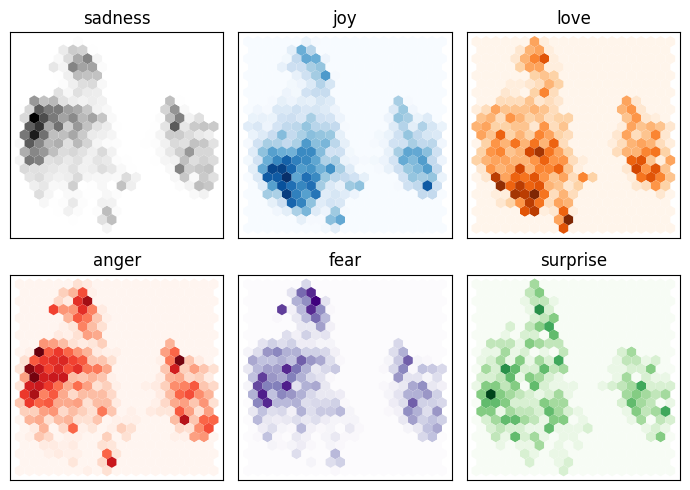

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten() # Convierte el array que representa los ejes en un array 1D
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)): 
    df_emb_sub = df_emb.query(f"label == {i}") 
    # Selecciono en subdataframe todos los valores de esa emocion y los represento
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, 
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label) 
    axes[i].set_xticks([]), axes[i].set_yticks([]) 

plt.tight_layout() 
plt.show()

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [84]:
from sklearn.dummy import DummyClassifier

El Dummy Classifier lo que hace es generar una clasificacion aleatoria sin basarse en los datos

In [85]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

Vemos que hay una mejora notoria con el baseline

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [87]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('Normalized Confusion Matrix')
    plt.show() 

In [88]:
y_preds = lr_clf.predict(X_valid)

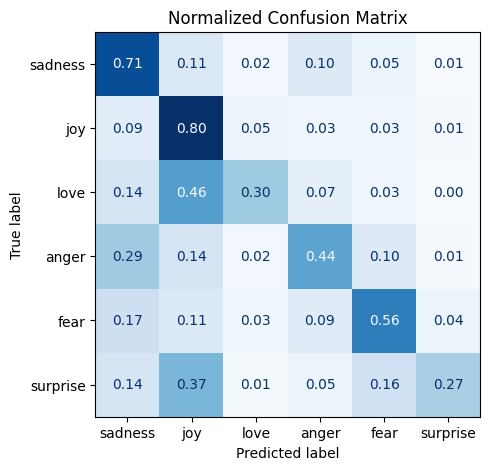

In [89]:
plot_confusion_matrix(y_preds, y_valid, labels)

# Fine-Tuning

In [90]:
from transformers import AutoModelForSequenceClassification

In [91]:
num_labels = 6

In [92]:
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Ese warning es porque algunas partes fueron inicializadas de manera aleatoria

Definimos las metricas para medir 

In [93]:
from sklearn.metrics import accuracy_score, f1_score

In [94]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1) 
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

In [95]:
from transformers import TrainingArguments

In [105]:
batch_size = 64 
logging_steps = len(emotions_encoded["train"]) // batch_size 
model_name = f"finetuned-emotion" 
training_args = TrainingArguments(output_dir=model_name, 
                                  num_train_epochs=2, 
                                  learning_rate=2e-5, 
                                  per_device_train_batch_size=batch_size, 
                                  per_device_eval_batch_size=batch_size, 
                                  weight_decay=0.01, 
                                  evaluation_strategy="epoch", 
                                  disable_tqdm=False, 
                                  logging_steps=logging_steps, 
                                  push_to_hub=False, 
                                  log_level="error")

In [107]:
from transformers import Trainer 

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=compute_metrics, 
                  train_dataset=emotions_encoded["train"], 
                  eval_dataset=emotions_encoded["validation"], 
                  tokenizer=tokenizer)

In [109]:
trainer.train();

  0%|          | 0/500 [00:00<?, ?it/s]

{'loss': 0.1846, 'learning_rate': 1e-05, 'epoch': 1.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.1683565080165863, 'eval_accuracy': 0.9355, 'eval_f1': 0.9355627553217494, 'eval_runtime': 3.5524, 'eval_samples_per_second': 563.005, 'eval_steps_per_second': 9.008, 'epoch': 1.0}
{'loss': 0.1244, 'learning_rate': 0.0, 'epoch': 2.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.14781653881072998, 'eval_accuracy': 0.937, 'eval_f1': 0.9372512725802009, 'eval_runtime': 3.6184, 'eval_samples_per_second': 552.726, 'eval_steps_per_second': 8.844, 'epoch': 2.0}
{'train_runtime': 249.0259, 'train_samples_per_second': 128.501, 'train_steps_per_second': 2.008, 'train_loss': 0.1545139389038086, 'epoch': 2.0}


In [110]:
preds_output = trainer.predict(emotions_encoded["validation"])

  0%|          | 0/32 [00:00<?, ?it/s]

In [111]:
preds_output.metrics

{'test_loss': 0.14781653881072998,
 'test_accuracy': 0.937,
 'test_f1': 0.9372512725802009,
 'test_runtime': 3.6353,
 'test_samples_per_second': 550.158,
 'test_steps_per_second': 8.803}

In [112]:
y_preds = np.argmax(preds_output.predictions, axis=1)

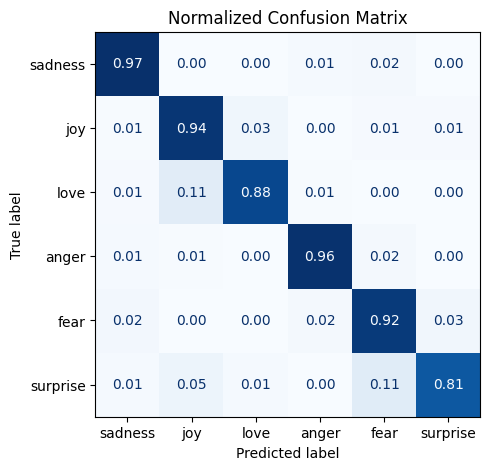

In [113]:
plot_confusion_matrix(y_preds, y_valid, labels)

Analizando el error

In [114]:
from torch.nn.functional import cross_entropy

In [115]:
def forward_pass_with_label(batch): 
    # Place all input tensors on the same device as the model 
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names} 
    with torch.no_grad(): 
        output = model(**inputs) 
        pred_label = torch.argmax(output.logits, axis=-1) 
        loss = cross_entropy(output.logits, batch["label"].to(device), 
                             reduction="none") 
        # Place outputs on CPU for compatibility with other dataset columns 
        return {"loss": loss.cpu().numpy(), 
                "predicted_label": pred_label.cpu().numpy()}

In [116]:
# Convert our dataset back to PyTorch tensors 
emotions_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"]) 

# Compute loss values 
emotions_encoded["validation"] = emotions_encoded["validation"].map( 
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [117]:
emotions_encoded.set_format("pandas") 
cols = ["text", "label", "predicted_label", "loss"] 
df_test = emotions_encoded["validation"][:][cols] 
df_test["label"] = df_test["label"].apply(label_int2str) 
df_test["predicted_label"] = (df_test["predicted_label"] 
                              .apply(label_int2str))

In [121]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,6.800436
318,i felt ashamed of these feelings and was scare...,fear,sadness,5.719112
1111,im lazy my characters fall into categories of ...,joy,fear,5.515276
882,i feel badly about reneging on my commitment t...,love,sadness,5.228557
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.961116
1836,i got a very nasty electrical shock when i was...,fear,anger,4.783373
1963,i called myself pro life and voted for perry w...,joy,fear,4.733971
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.621624
1801,i feel that he was being overshadowed by the s...,love,sadness,4.529886
1156,i worked as an editor and part of my job was t...,love,anger,4.365310


## Save the model

In [122]:
from transformers import pipeline

In [123]:
model_id = 'finetuned-emotion/checkpoint-500/'

In [124]:
classifier = pipeline('text-classification', model=model_id)

In [125]:
custom_tweet = "I saw a movie today and it was really good."

In [127]:
preds = classifier(custom_tweet, top_k=None)

In [128]:
preds

[{'label': 'LABEL_1', 'score': 0.9802031517028809},
 {'label': 'LABEL_0', 'score': 0.006400678772479296},
 {'label': 'LABEL_3', 'score': 0.006336025428026915},
 {'label': 'LABEL_2', 'score': 0.003074625041335821},
 {'label': 'LABEL_4', 'score': 0.002299016807228327},
 {'label': 'LABEL_5', 'score': 0.001686475588940084}]

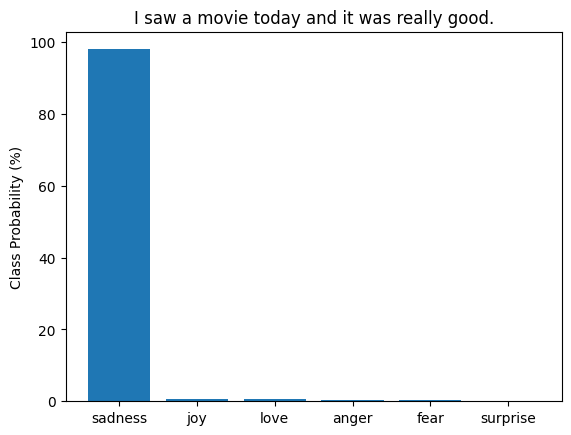

In [129]:
preds_df = pd.DataFrame(preds)
plt.bar(labels, 100*preds_df['score'], color='C0')
plt.title(f'{custom_tweet}')
plt.ylabel('Class Probability (%)')
plt.show()